In [33]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 19 ##

### Percentiles

In [34]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [35]:
# Step 1. Sort the data
np.sort(x)

array([ 7, 20, 28, 34, 43, 51])

In [36]:
# Step 2. Figure out where 55th percentile would be.

In [37]:
# OR: 1 Line of Code
percentile(55, x)

34

In [38]:
# If we tried to compute which element to take...
55 / 100 * 6

3.3000000000000003

### Sample Median

In [39]:
chi = Table.read_table('chicago_salary_2021.csv')
chi = chi.where("Annual Salary", are.above(0)).drop("Full or Part-Time","Hourly Rate", "Typical Hours")

In [40]:
# Who is making the most money
chi.sort('Annual Salary', descending=True).show(5)

Name,Job Titles,Department,Salary or Hourly,Annual Salary
"RHEE, JAMIE L",COMMISSIONER OF AVIATION,AVIATION,Salary,275004
"BROWN, DAVID O",SUPERINTENDENT OF POLICE,POLICE,Salary,260004
"FORD II, RICHARD C",FIRE COMMISSIONER,FIRE,Salary,217728
"LIGHTFOOT, LORI E",MAYOR,MAYOR'S OFFICE,Salary,216210
"NANCE HOLT, ANNETTE M",FIRST DEPUTY FIRE COMMISSIONER,FIRE,Salary,197736


In [41]:
# Who is making the least money
chi.sort('Annual Salary', descending=False).show(5)

Name,Job Titles,Department,Salary or Hourly,Annual Salary
"MORRIS, VERNICA R",ALDERMANIC AIDE,CITY COUNCIL,Salary,20400
"ADELMAN, BRUCE E",LEGISLATIVE AIDE,CITY COUNCIL,Salary,20568
"MUNOZ, MAYRA L",LEGISLATIVE AIDE,CITY COUNCIL,Salary,21840
"BURKS, BRITTANY S",ALDERMANIC AIDE,CITY COUNCIL,Salary,22800
"DUKES, DOROTHY L",COMMITTEE SECRETARY,CITY COUNCIL,Salary,25848


In [42]:
pop_median = percentile(50, chi.column('Annual Salary'))
pop_median

90024.0

In [96]:
our_sample = chi.sample(200, with_replacement=False)
our_sample.show(5)

Name,Job Titles,Department,Salary or Hourly,Annual Salary
"TRACEY, KRISTIN M",SERGEANT,POLICE,Salary,118998
"PENA, LUIS A",WARD SUPERINTENDENT,STREETS & SAN,Salary,100668
"ALVAREZ JR, RAFAEL",CAPTAIN-EMT,FIRE,Salary,146538
"GARCIA, SARAH",STAFF ASST,HEALTH,Salary,100716
"GARCIA, LIONEL",POLICE COMMUNICATIONS OPERATOR II,OEMC,Salary,73380


In [97]:
percentile(50, our_sample.column('Annual Salary'))

90828.0

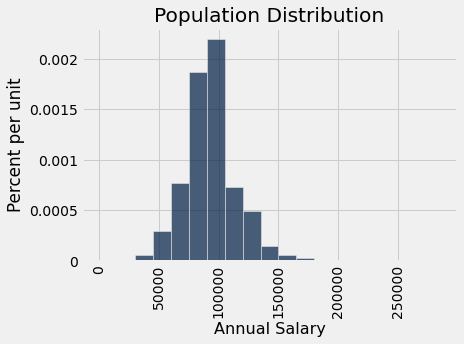

In [98]:
chi_bins = np.arange(0, 300000, 15000)
chi.hist('Annual Salary', bins=chi_bins)
plots.title('Population Distribution');

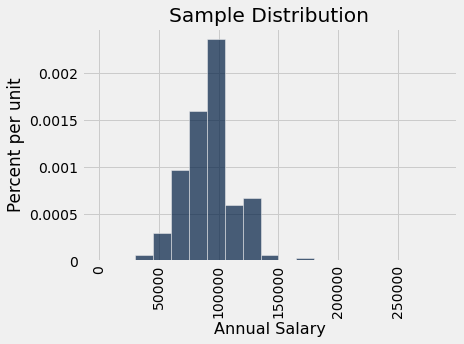

In [99]:
our_sample.hist('Annual Salary', bins=chi_bins)
plots.title('Sample Distribution');

# Variability of the Estimate

In [69]:
def generate_sample_median(samp_size):
    our_sample = chi.sample(samp_size, with_replacement=False)
    return percentile(50, our_sample.column('Annual Salary'))

In [100]:
sample_median = generate_sample_median(200)
sample_median

91338.0

In [101]:
error = sample_median - pop_median
error

1314.0

# Quantifying Uncertainty

In [102]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(100)
    sample_medians = np.append(sample_medians, new_median)

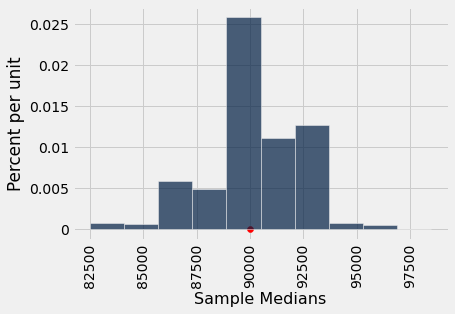

In [103]:
med_bins = np.arange(82500, 100000, 1600)
Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, -1e-6, color="red");

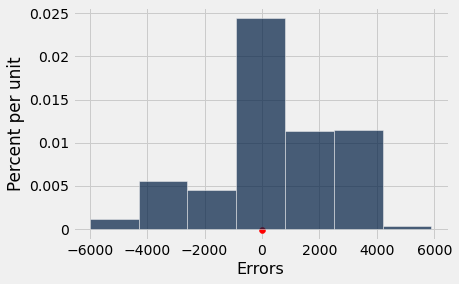

In [104]:
err_bins = np.arange(-6000, 6000, 1700)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");

# Bootstrap

Population Median =        90024.0
Our Sample Median =        91338.0
Bootstrap Sample Median =  93354.0


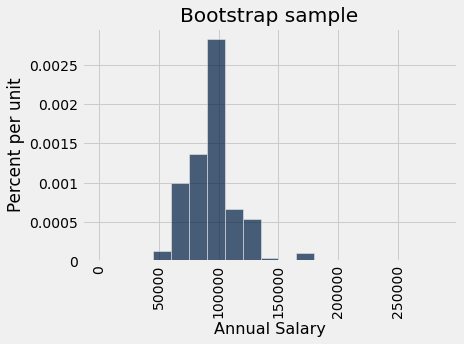

In [105]:
# Take a bootstrap (re)sample of size 200, WITH replacement
boot_sample = our_sample.sample(200, with_replacement=True)
boot_sample.hist('Annual Salary', bins=chi_bins)
plots.title('Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Annual Salary')))

In [106]:
def one_bootstrap_median():
    boot_resample = our_sample.sample()
    return percentile(50, boot_resample.column('Annual Salary'))

In [107]:
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

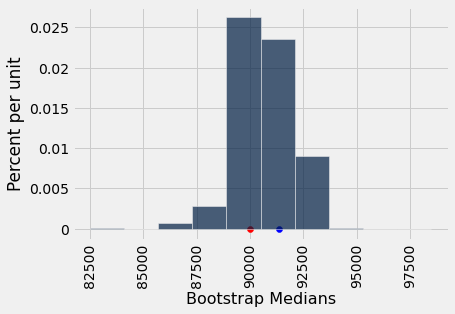

In [108]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, -1e-6, color="red");
plots.scatter(sample_median, -1e-6, color="blue");

## Confidence Intervals

The confidence interval is an interval based on the middle 95% of bootstrap samples.  The interval will be shown in yellow, the sample median (our estimate) in blue, and the true population median (the parameter) in red.

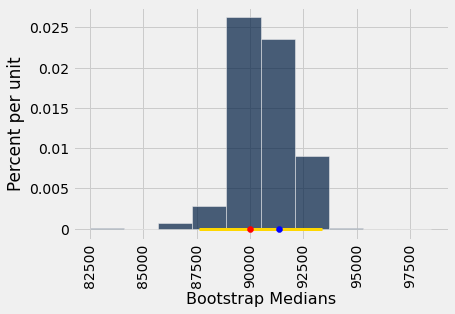

In [109]:
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [-1e-6,-1e-6], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, -1e-6, color="red", zorder=2);
plots.scatter(sample_median, -1e-6, color="blue", zorder=2);

## Confidence Interval for the Mean Maternal Age

In [90]:
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


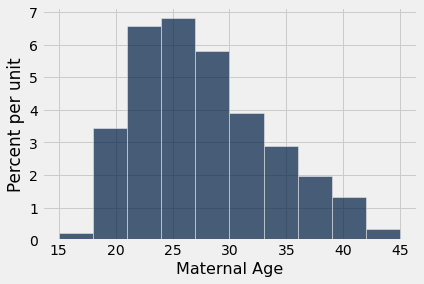

In [91]:
births.hist('Maternal Age')

In [92]:
pop_mean_age = np.mean(births.column('Maternal Age'))
pop_mean_age

27.228279386712096

In [93]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [94]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

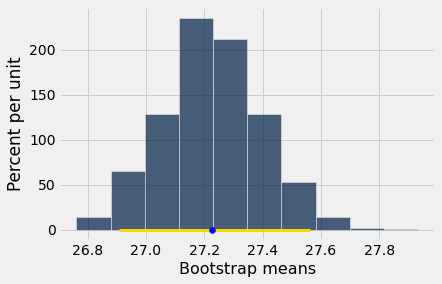

In [95]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.plot([left,right], [-1e-4, -1e-4], color="gold", lw=3, zorder=1);
plots.scatter(pop_mean_age, -1e-4, color="blue", zorder=2);